In [3]:
!pip install bambi

Defaulting to user installation because normal site-packages is not writeable
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 29.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 80.4 MB/s eta 0:00:00
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
  Created wheel for cons: filename=cons-0.4.6-py3-none-any.whl size=9135 sha256=bd830cd30906e06d04b62b

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
Modeling the probability that crash==1
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, campaign]


Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 145 seconds.
Modeling the probability that crash==1
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, campaign]


Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 141 seconds.


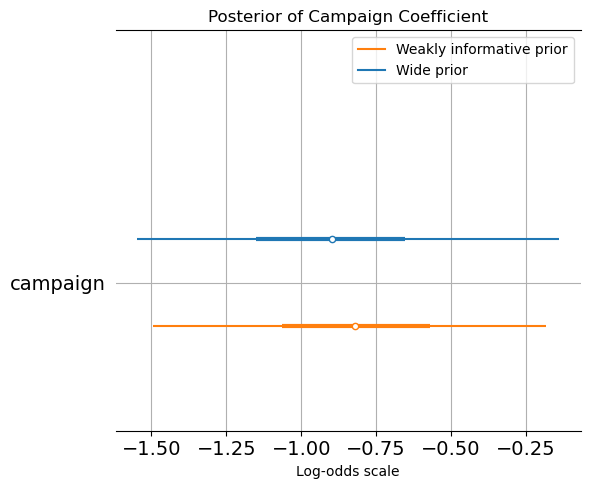

In [1]:
import numpy as np, pandas as pd, bambi as bmb, arviz as az, matplotlib.pyplot as plt

# Simulate 200 road segments, half with campaign
np.random.seed(123)
N = 200
campaign = np.random.binomial(1, 0.5, size=N)

# True data-generating process: intercept = –1, effect = –1
log_odds = -1 + (-1)*campaign
p = 1/(1 + np.exp(-log_odds))
crash = np.random.binomial(1, p)

data = pd.DataFrame({"crash": crash, "campaign": campaign})

# Model A: default (very wide) priors
m1 = bmb.Model("crash ~ campaign", data, family="bernoulli")
res1 = m1.fit(draws=1000, tune=500)

# Model B: our weakly informative prior Normal(0,1)
m2 = bmb.Model("crash ~ campaign", data, family="bernoulli")
m2.set_priors({"campaign": bmb.Prior("Normal", mu=0, sigma=1)})
res2 = m2.fit(draws=1000, tune=500)

# Forest plot comparison
az.plot_forest([res1, res2],
               model_names=["Wide prior", "Weakly informative prior"],
               var_names=["campaign"], combined=True)
plt.title("Posterior of Campaign Coefficient")
plt.xlabel("Log-odds scale")
plt.grid(True)
plt.show()
